In [6]:
# Install & Import Required Libraries

#Install PyTorch (only needed if not pre-installed; Colab usually has it)
# !pip install torch torchvision

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np


In [7]:
# Load and Preprocess the Iris Dataset
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [8]:
#Define Neural Network Model
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return self.softmax(out)


In [9]:
#Set Up Loss Function and Optimizer
model = IrisNet()

# Use raw class labels for CrossEntropyLoss
y_train_class = torch.LongTensor(np.argmax(y_train.numpy(), axis=1))
y_test_class = torch.LongTensor(np.argmax(y_test.numpy(), axis=1))

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [10]:
#Train the Model
epochs = 100

for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train_class)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/100], Loss: 0.9844
Epoch [20/100], Loss: 0.8599
Epoch [30/100], Loss: 0.7779
Epoch [40/100], Loss: 0.7293
Epoch [50/100], Loss: 0.6945
Epoch [60/100], Loss: 0.6586
Epoch [70/100], Loss: 0.6297
Epoch [80/100], Loss: 0.6140
Epoch [90/100], Loss: 0.6034
Epoch [100/100], Loss: 0.5968


In [11]:
#Evaluate Model Accuracy
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    correct = (predicted == y_test_class).sum().item()
    accuracy = correct / y_test_class.size(0)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 100.00%


**Step-by-Step: View & Explore the Iris Dataset**

In [12]:
#Load the Dataset
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()

In [13]:
#View Dataset Keys (like a dictionary)
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
#Convert to a Pandas DataFrame (Best for Viewing)
import pandas as pd

# Create a DataFrame for better visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target labels (0, 1, 2)
df['target'] = iris.target

# Optionally: Add target class names (setosa, versicolor, virginica)
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Show the first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
#Check Dataset Size and Types
# Shape (rows, columns)
print("Shape:", df.shape)

# Column data types
print("\nData types:")
print(df.dtypes)

# Summary statistics
df.describe()


Shape: (150, 6)

Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
species               object
dtype: object


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


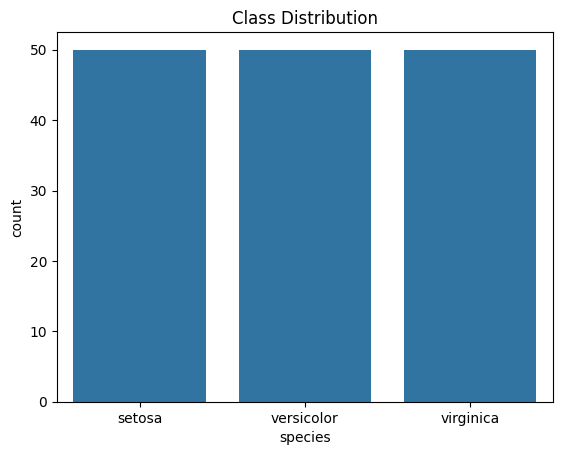

In [16]:
#Visualize Class Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each species
sns.countplot(x='species', data=df)
plt.title("Class Distribution")
plt.show()